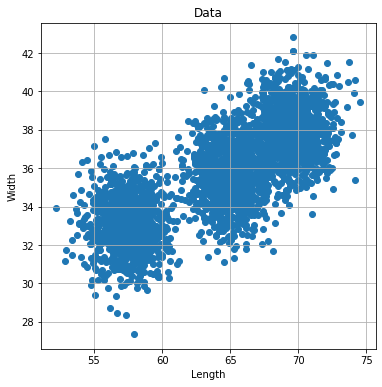

In [ ]:
import numpy as np                          
import math
%matplotlib inline                          



X = np.genfromtxt(r'Tshirts Dataset.csv', delimiter=',')
K = 3
iterations = 100

plt.figure(figsize=(6, 6))
plt.scatter(X[:, 0], X[:, 1])
plt.title("Data")
plt.xlabel('Length')
plt.ylabel('Width')
plt.grid(True)

In [ ]:
def Init_Centroids(X, K):
    m, n = X.shape
    
    # You should return this values correctly
    Centroids = np.zeros((K, n))

    
    randidx = np.random.permutation(X.shape[0])
    
    # Take the first K examples as centroids
    Centroids = X[randidx[:K], :]
    
    return Centroids

In [ ]:
C = Init_Centroids(X,K)
print(C)
X.shape



[[54.9601527  32.71853551]
 [70.27159954 38.91803515]
 [63.00838441 35.59862757]]


(3000, 2)

In [ ]:
def Calculate_Distance(P,Q):

    Distance = 0
    
    Distance=math.sqrt( ((P[0]- Q[0])**2)+((P[1]-Q[1])**2) )
    return Distance

In [ ]:
Distance = Calculate_Distance([6.35,50.79],[2.13,70.64])
print(Distance)

20.293617223156645


In [ ]:
def AssignItemCentroid(X, Centroids):
   

    ExamplesCentroids = np.zeros(X.shape[0], dtype=int)
    for i in range(3000):
        minimum=100000000000
        for j in range(3):
            d=math.sqrt( ((X[i,0]- Centroids[j,0])**2)+((X[i,1]- Centroids[j,1])**2) )
            if d<minimum:
            minimum=d
            ExamplesCentroids[i]=j 
      
     

    return ExamplesCentroids

In [ ]:
Cen = np.array([[55.94703516,34.13791425],
                [69.39010661,38.41906049],
                [68.30947147,35.25632493]])
ExamplesCentroids = AssignItemCentroid(X, Cen)
print(ExamplesCentroids[:10])

[2 2 0 2 0 1 0 0 2 2]


In [ ]:
def computeCentroidsMeans(X, ExamplesCentroids, K):

    m, n = X.shape
    Centroids = np.zeros((K, n))
    
   
    for i in range(3):
        sum=0
        counter=0
    for j in range(3000):
        if ExamplesCentroids[j]==i:
            sum=sum+X[i]
            counter=counter+1
        Centroids[i]=sum/counter     






    
    return Centroids

In [ ]:

Cen = np.array([[55.94703516,34.13791425],
[69.39010661,38.41906049],
[68.30947147,35.25632493]])
ExCen = AssignItemCentroid(X, Cen)
Means = (X,  ExCen, K)
print(Means[0][:4])


[[68.97090377 35.89513132]
 [65.64814248 33.54754707]
 [56.52163204 30.92447103]
 [64.29842045 36.87739494]]


In [ ]:
def Run_KMeans():
    Centroids = None
    ExamplesCentroids = None
    Centroids = Init_Centroids(X, K)
    for i in range(iterations):
      ExamplesCentroids = AssignItemCentroid(X, Centroids)
 
      Centroids = computeCentroidsMeans(X, ExamplesCentroids, K)


    
    return Centroids,ExamplesCentroids

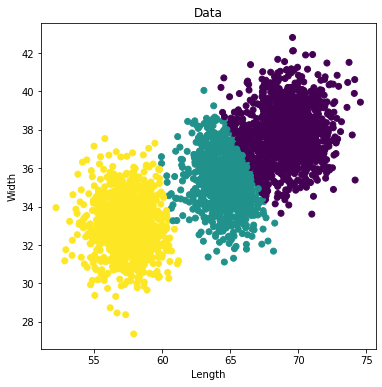

In [ ]:
_,ExamplesCentroids = Run_KMeans()

fig = plt.figure(figsize=(6, 6))
AllData = fig.add_subplot(111)
AllData.scatter(X[:, 0], X[:, 1],c=ExamplesCentroids)
plt.title("Data")
plt.xlabel('Length')
plt.ylabel('Width')
plt.grid(False)